In [1]:
import sys
sys.path.append('../shared/')
from reader import *
from graficos import *
from grafo import *
from fuente import *

In [17]:
SNIFF_TIMEOUT = 1200
PCAP_FILE = "macdonals1.pcap"

In [18]:
packages = readPackagesOffline(PCAP_FILE)

In [19]:
fuente = calcularFuenteS1(packages)

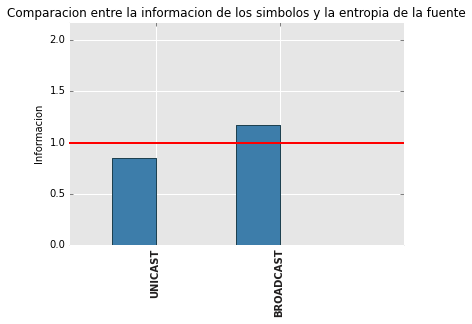

In [20]:
%matplotlib inline  
graficar_comparacion_simbolos_entropia(fuente)

## Ejercicio 3.2.2

In [21]:
fuente_s2, who_has_packages = calcularFuenteS2(packages)

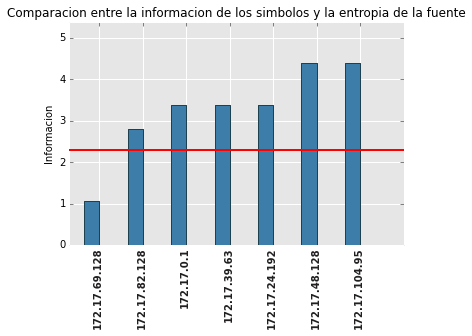

In [22]:
graficar_comparacion_simbolos_entropia(fuente_s2)

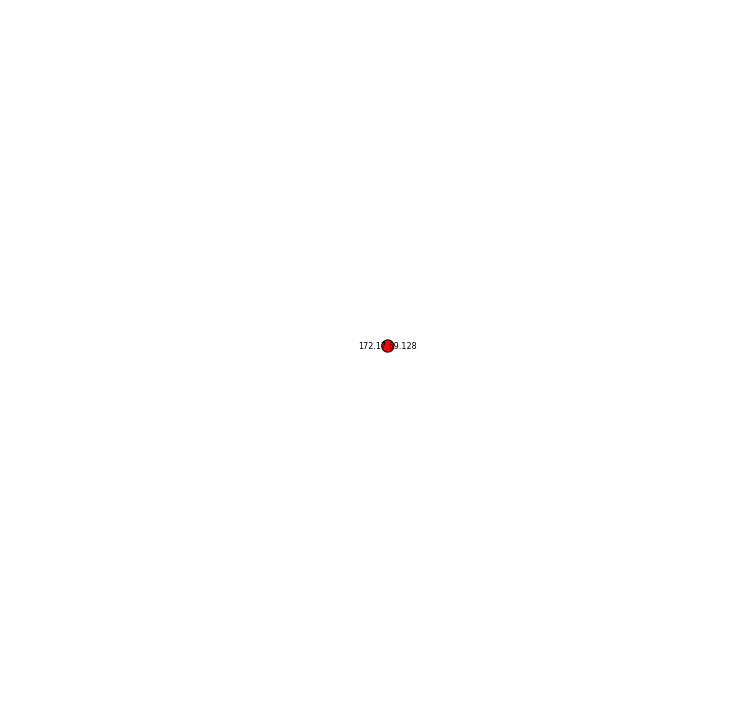

Cantidad de Nodos:  1
Cantidad de Enlaces:  1


In [23]:
import pylab
A, etiquetas = crear_grafo(who_has_packages, fuente_s2.value_counts())        
plt.figure(2)
plt.figure(3,figsize=(12,12)) 

pos=nx.spring_layout(A)
nx.draw_networkx_labels(A,pos,etiquetas,node_size=60,font_size=8)
nx.draw(A,pos,node_size=150,font_size=8)
pylab.show()

print "Cantidad de Nodos: ", A.number_of_nodes()
print "Cantidad de Enlaces: ", A.number_of_edges()

In [9]:
len(who_has_packages)

2520